In [6]:
# Importar Pandas, Matplotlib, Chardet e FPDF

import pandas as pd
import matplotlib.pyplot as plt
import chardet
from fpdf import FPDF

In [7]:
# Detectar a codificação do arquivo CSV

with open('PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [8]:
# Carregar o arquivo .csv

df = pd.read_csv('PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv', sep=',', encoding=encoding)

In [9]:
# Dicionário que mapeia estados para regiões

estado_para_regiao = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'SC': 'Sul', 'PR': 'Sul',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste',
    'PB': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'PI': 'Nordeste',
    'MA': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'PA': 'Norte', 'AM': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'AP': 'Norte', 'TO': 'Norte', 'AC': 'Norte'
}

In [10]:
# Adicionar uma coluna de região ao DataFrame

df['REGIAO'] = df['UF'].map(estado_para_regiao)

In [11]:
# Contar o número total de IES por região

ies_por_regiao = df['REGIAO'].value_counts()

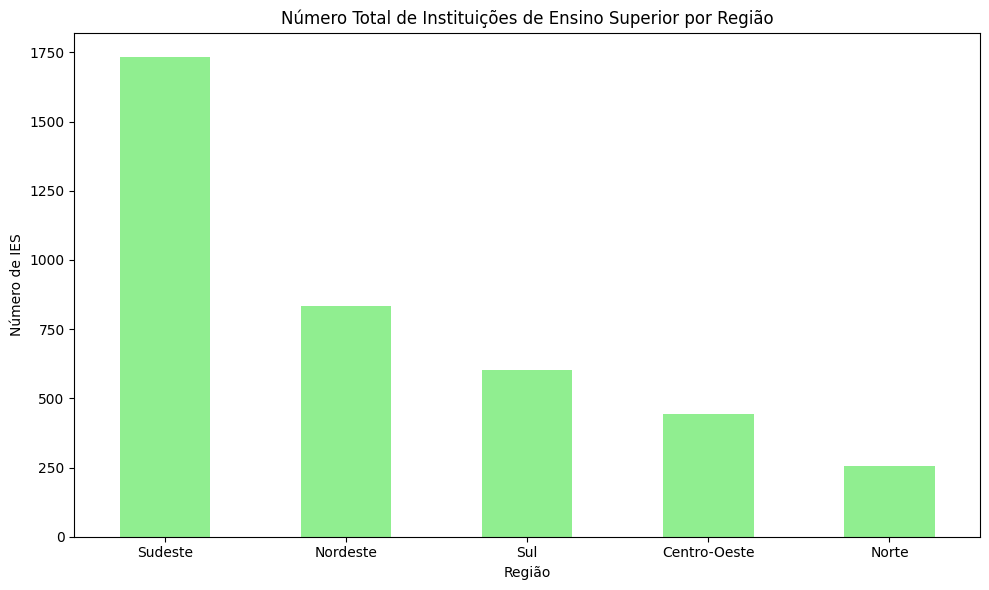

In [14]:
# Gráfico

plt.figure(figsize=(10, 6))
ies_por_regiao.plot(kind='bar', color='lightgreen')
plt.title('Número Total de Instituições de Ensino Superior por Região')
plt.xlabel('Região')
plt.ylabel('Número de IES')
plt.xticks(rotation=0)  # Mantenha os rótulos das regiões na horizontal
plt.tight_layout()
plt.show()

In [15]:
# Filtrar apenas IES públicas

df_publicas = df[df['CATEGORIA_DA_IES'].str.strip() == 'Pública']

In [19]:
# Adicionar uma coluna de região ao DataFrame

df_publicas.loc[:, 'REGIAO'] = df_publicas['UF'].map(estado_para_regiao)


In [20]:
# Contar o número de IES públicas por região

ies_publicas_por_regiao = df_publicas['REGIAO'].value_counts()

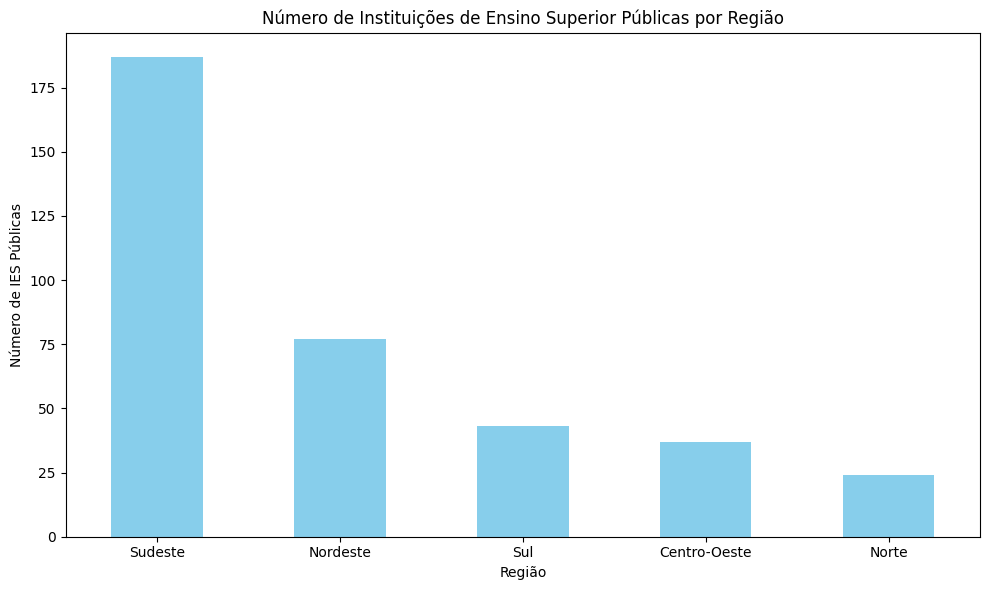

In [21]:
# Gráfico

plt.figure(figsize=(10, 6))
ies_publicas_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Número de Instituições de Ensino Superior Públicas por Região')
plt.xlabel('Região')
plt.ylabel('Número de IES Públicas')
plt.xticks(rotation=0)  # Mantenha os rótulos das regiões na horizontal
plt.tight_layout()
plt.show()


In [22]:
# Filtrar apenas IES privadas

df_privadas = df[df['CATEGORIA_DA_IES'].str.strip() == 'Privada']

In [26]:
# Contar o número total de IES privadas por região

ies_privadas_por_regiao = df_privadas['REGIAO'].value_counts()

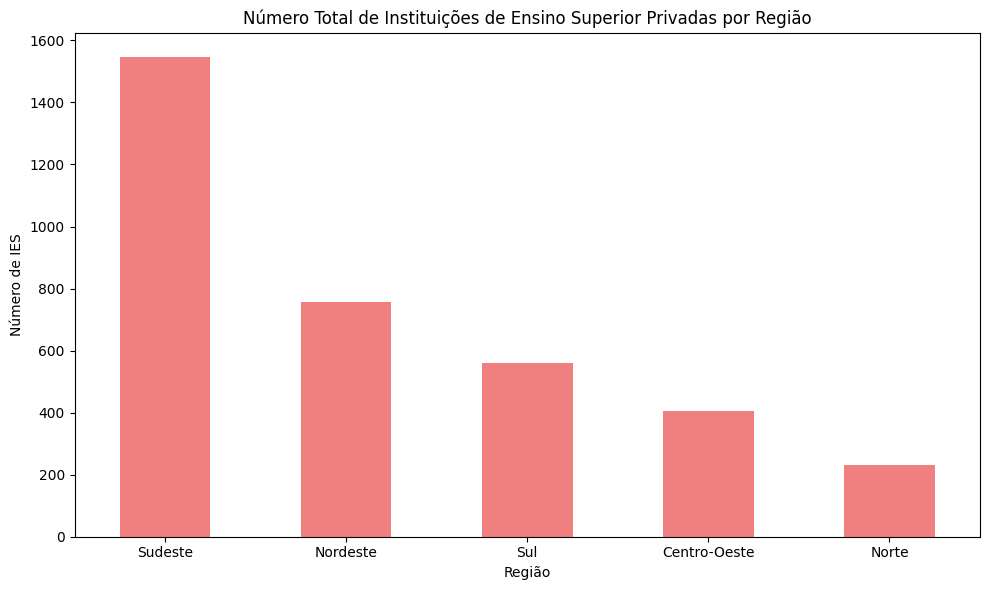

In [28]:
# Gráfico

plt.figure(figsize=(10, 6))
ies_privadas_por_regiao.plot(kind='bar', color='lightcoral')
plt.title('Número Total de Instituições de Ensino Superior Privadas por Região')
plt.xlabel('Região')
plt.ylabel('Número de IES')
plt.xticks(rotation=0)  # Mantenha os rótulos das regiões na horizontal
plt.tight_layout()
plt.show()

Relatório gerado com sucesso: relatorio_ies_brasil_com_graficos.pdf


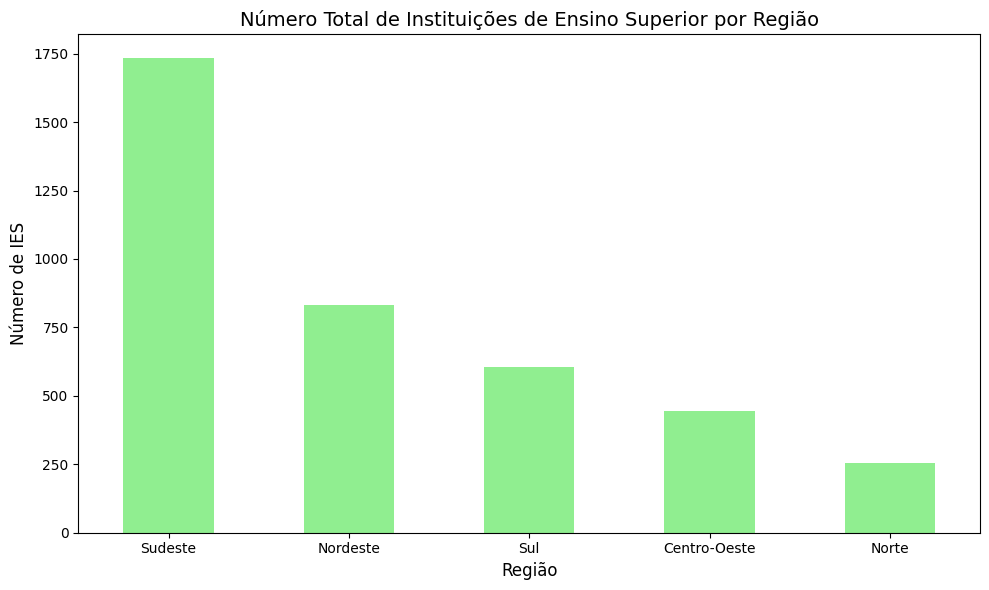

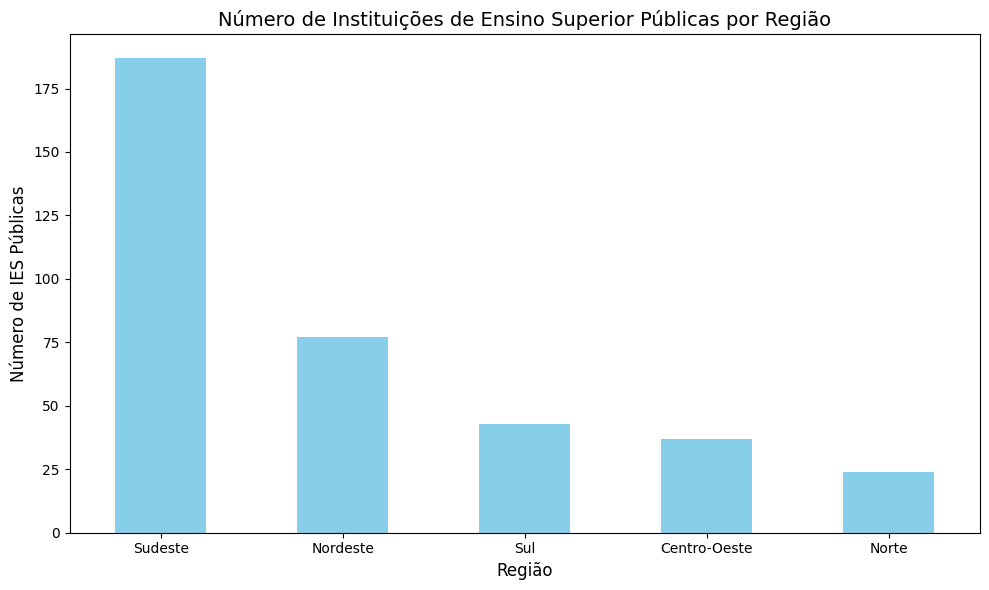

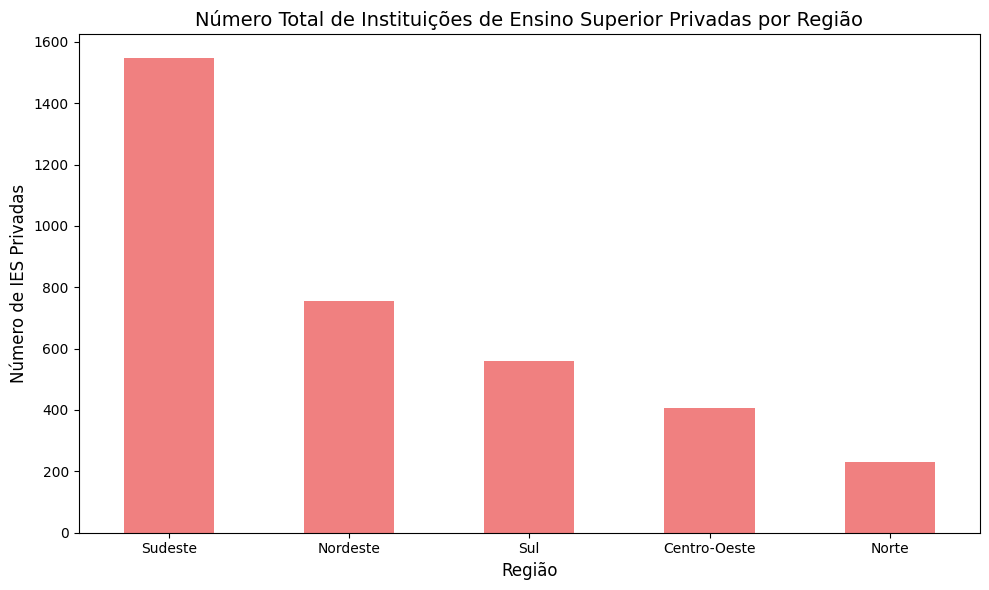

In [46]:
from fpdf import FPDF
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detectar a codificação do arquivo CSV
with open('PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Carregar o arquivo .csv
df = pd.read_csv('PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv', sep=',', encoding=encoding)

# Dicionário que mapeia estados para regiões
estado_para_regiao = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'SC': 'Sul', 'PR': 'Sul',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste',
    'PB': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'PI': 'Nordeste',
    'MA': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'PA': 'Norte', 'AM': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'AP': 'Norte', 'TO': 'Norte', 'AC': 'Norte'
}

# Adicionar uma coluna de região ao DataFrame
df['REGIAO'] = df['UF'].map(estado_para_regiao)

# Filtrar apenas IES públicas e privadas
df_publicas = df[df['CATEGORIA_DA_IES'].str.strip() == 'Pública']
df_privadas = df[df['CATEGORIA_DA_IES'].str.strip() == 'Privada']

# Contar o número de IES por região
ies_por_regiao = df['REGIAO'].value_counts()
ies_publicas_por_regiao = df_publicas['REGIAO'].value_counts()
ies_privadas_por_regiao = df_privadas['REGIAO'].value_counts()

# Gráfico Total de IES por Região
plt.figure(figsize=(10, 6))
ies_por_regiao.plot(kind='bar', color='lightgreen')
plt.title('Número Total de Instituições de Ensino Superior por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de IES', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('total_ies_por_regiao.png')

# Gráfico IES Públicas por Região
plt.figure(figsize=(10, 6))
ies_publicas_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Número de Instituições de Ensino Superior Públicas por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de IES Públicas', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('ies_publicas_por_regiao.png')

# Gráfico IES Privadas por Região
plt.figure(figsize=(10, 6))
ies_privadas_por_regiao.plot(kind='bar', color='lightcoral')
plt.title('Número Total de Instituições de Ensino Superior Privadas por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de IES Privadas', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('ies_privadas_por_regiao.png')

# Cria uma classe personalizada para o PDF
class PDF(FPDF):
    def header(self):
        # Este método será usado para o cabeçalho apenas na primeira página
        pass

    def footer(self):
        # Remove a marcação de número da página
        pass

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def insert_image(self, image_path):
        self.image(image_path, x=10, w=180)
        self.ln(10)  # Espaço após a imagem

    def add_title_page(self):
        # Adiciona a página inicial com o título principal
        self.add_page()
        self.set_font('Arial', 'B', 16)  # Título principal em fonte maior
        self.cell(0, 10, 'Relatório sobre a Distribuição das Instituições de Ensino Superior no Brasil', 0, 1, 'C')
        self.ln(20)  # Espaço abaixo do título

# Cria uma instância do PDF
pdf = PDF()

# Adiciona a página inicial com o título principal
pdf.add_title_page()

# Adiciona conteúdo ao PDF
pdf.chapter_title('Número Total de Instituições de Ensino Superior por Região')
pdf.chapter_body(
    "A distribuição das instituições de ensino superior (IES) no Brasil é marcada por uma concentração significativa nas regiões Sudeste e Sul. Estas regiões, que incluem estados como São Paulo, Rio de Janeiro, Minas Gerais, Espírito Santo, Paraná, Santa Catarina e Rio Grande do Sul, possuem a maior oferta de IES, refletindo seu maior desenvolvimento econômico e densidade populacional. Em contraste, as regiões Norte e Nordeste têm um número consideravelmente menor de instituições, indicando uma desigualdade na cobertura educacional entre as diferentes partes do país."
)
pdf.insert_image('total_ies_por_regiao.png')

pdf.chapter_title('Número de Instituições de Ensino Superior Públicas por Região')
pdf.chapter_body(
    "Dentro do cenário educacional brasileiro, as instituições públicas desempenham um papel crucial na oferta de educação superior gratuita ou a custos reduzidos. No entanto, a distribuição dessas instituições é igualmente desigual. A maior parte das universidades e centros de ensino públicos está localizada nas regiões Sudeste e Sul, enquanto as regiões Norte e Nordeste enfrentam uma escassez significativa de instituições públicas. Essa discrepância limita o acesso à educação superior para residentes dessas áreas e reforça a necessidade de expansão das instituições públicas para promover uma maior equidade educacional."
)
pdf.insert_image('ies_publicas_por_regiao.png')

pdf.ln(30)  # Espaço maior entre o gráfico e o próximo título

pdf.chapter_title('Número Total de Instituições de Ensino Superior Privadas por Região')
pdf.chapter_body(
    "As instituições privadas dominam o cenário educacional brasileiro, com uma presença marcante em todas as regiões do país. Apesar de sua ampla oferta, as instituições privadas podem representar um custo elevado para muitos estudantes, especialmente em regiões com menor oferta pública. A predominância das IES privadas é uma resposta à demanda por educação superior, mas também destaca a desigualdade no acesso, uma vez que muitas famílias podem enfrentar dificuldades financeiras para arcar com as mensalidades."
)
pdf.insert_image('ies_privadas_por_regiao.png')

pdf.ln(20)  # Espaço maior entre o gráfico e o próximo título

pdf.chapter_title('Ensino a Distância (EAD) como Alternativa')
pdf.chapter_body(
    "Dada a concentração de instituições de ensino superior nas regiões centrais do Brasil, muitos estudantes que residem em áreas periféricas ou menos desenvolvidas têm recorrido ao ensino a distância (EAD) como uma alternativa viável. O EAD permite que estudantes de regiões remotas ou com menor oferta educacional acessem cursos e programas de qualidade sem a necessidade de deslocamento físico, oferecendo uma solução para a desigualdade na distribuição das IES. Esta modalidade tem se tornado cada vez mais popular e essencial para garantir que o ensino superior seja acessível a um público mais amplo."
)

pdf.chapter_title('Conclusão')
pdf.chapter_body(
    "A distribuição desigual das instituições de ensino superior no Brasil reflete uma concentração significativa nas regiões Sudeste e Sul, com uma escassez notável nas regiões Norte e Nordeste. A predominância de instituições privadas e a limitada presença de instituições públicas fora das áreas mais desenvolvidas evidenciam a necessidade de políticas que promovam uma expansão mais equilibrada da oferta educacional. O ensino a distância surge como uma solução importante para superar as barreiras geográficas e financeiras, oferecendo uma alternativa acessível para estudantes em regiões menos favorecidas. Para alcançar uma educação superior mais equitativa, é fundamental investir na ampliação da infraestrutura educacional e no suporte às modalidades de ensino que garantam o acesso a todos os brasileiros, independentemente de sua localização."
)

# Salva o PDF
pdf_output_path = 'relatorio_ies_brasil_com_graficos.pdf'
pdf.output(pdf_output_path)

print(f"Relatório gerado com sucesso: {pdf_output_path}")
